## Wafer Dataset

In [1]:
import pandas as pd
import os
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # Handling Feature Scaling
from sklearn.pipeline import Pipeline #Pipeline Creation
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,accuracy_score
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Change the directory
os.chdir("Training_Batch_Files") # specifying directory name to read the files 

In [4]:
df = pd.DataFrame()

In [5]:
for file in os.listdir():
    file_data = pd.read_csv(file)
    df = pd.concat([df, file_data], axis=0)

In [6]:
df

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Unnamed: 581,Unnamed: 582,Unnamed: 583,Unnamed: 584,Unnamed: 585,Unnamed: 586,Unnamed: 587,Unnamed: 588,Unnamed: 589,Unnamed: 590
0,Wafer-1400,3034.74,2458.90,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wafer-1401,3038.57,2380.39,2205.5000,1287.3538,2.3842,100.0,111.7644,0.1241,1.4855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wafer-1402,2902.88,2259.49,2205.5000,1287.3538,2.3842,100.0,111.7644,0.1241,1.4089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wafer-1403,3001.45,2481.72,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.6217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wafer-1404,2975.72,2585.72,2150.0556,1215.2183,1.4756,100.0,100.9744,0.1244,1.4413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Wafer-595,2989.44,2487.66,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.5301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Wafer-596,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Wafer-597,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Wafer-598,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sensor-1,3963.0,3013.811812,73.149044,2743.2400,2967.5300,3009.7100,3055.8700,3356.3500
Sensor-2,3960.0,2495.254755,81.310429,2158.7500,2452.1000,2499.0400,2539.4600,2846.4400
Sensor-3,3942.0,2199.344513,29.521253,2060.6600,2180.0556,2200.2000,2217.0000,2315.2667
Sensor-4,3942.0,1380.313126,433.285353,0.0000,1084.3779,1275.0917,1561.7164,3715.0417
Sensor-5,3942.0,4.701892,61.240989,0.6815,0.9747,1.3076,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
Unnamed: 586,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 587,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 588,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 589,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 0 to 100
Data columns (total 629 columns):
 #    Column        Non-Null Count  Dtype  
---   ------        --------------  -----  
 0    Unnamed: 0    3980 non-null   object 
 1    Sensor-1      3963 non-null   float64
 2    Sensor-2      3960 non-null   float64
 3    Sensor-3      3942 non-null   float64
 4    Sensor-4      3942 non-null   float64
 5    Sensor-5      3942 non-null   float64
 6    Sensor-6      3942 non-null   float64
 7    Sensor-7      3842 non-null   float64
 8    Sensor-8      3858 non-null   float64
 9    Sensor-9      3876 non-null   float64
 10   Sensor-10     3876 non-null   float64
 11   Sensor-11     3876 non-null   float64
 12   Sensor-12     3876 non-null   float64
 13   Sensor-13     3876 non-null   float64
 14   Sensor-14     3874 non-null   float64
 15   Sensor-15     3874 non-null   float64
 16   Sensor-16     3874 non-null   float64
 17   Sensor-17     3874 non-null   float64
 18   Sensor-

In [9]:
df = df.iloc[:,0:592]

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 0 to 100
Data columns (total 592 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Unnamed: 0  3980 non-null   object 
 1    Sensor-1    3963 non-null   float64
 2    Sensor-2    3960 non-null   float64
 3    Sensor-3    3942 non-null   float64
 4    Sensor-4    3942 non-null   float64
 5    Sensor-5    3942 non-null   float64
 6    Sensor-6    3942 non-null   float64
 7    Sensor-7    3842 non-null   float64
 8    Sensor-8    3858 non-null   float64
 9    Sensor-9    3876 non-null   float64
 10   Sensor-10   3876 non-null   float64
 11   Sensor-11   3876 non-null   float64
 12   Sensor-12   3876 non-null   float64
 13   Sensor-13   3876 non-null   float64
 14   Sensor-14   3874 non-null   float64
 15   Sensor-15   3874 non-null   float64
 16   Sensor-16   3874 non-null   float64
 17   Sensor-17   3874 non-null   float64
 18   Sensor-18   3874 non-null   float64
 19   Senso

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True) # removing since this column data are name of wafers

In [12]:
df

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3034.74,2458.90,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5447,0.0036,...,368.8936,0.5008,0.0137,0.0033,2.7317,0.0048,0.0178,0.0055,368.8936,NaN
1,3038.57,2380.39,2205.5000,1287.3538,2.3842,100.0,111.7644,0.1241,1.4855,-0.0034,...,NaN,0.5018,0.0162,0.0036,3.2353,0.0048,0.0178,0.0055,368.8936,NaN
2,2902.88,2259.49,2205.5000,1287.3538,2.3842,100.0,111.7644,0.1241,1.4089,0.0156,...,197.1279,0.5026,0.0158,0.0041,3.1508,0.0091,0.0180,0.0053,197.1279,NaN
3,3001.45,2481.72,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.6217,-0.0088,...,120.6365,0.5011,0.0125,0.0036,2.4872,0.0157,0.0190,0.0059,120.6365,NaN
4,2975.72,2585.72,2150.0556,1215.2183,1.4756,100.0,100.9744,0.1244,1.4413,0.0086,...,NaN,0.4986,0.0120,0.0030,2.4101,0.0157,0.0190,0.0059,120.6365,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2989.44,2487.66,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.5301,-0.0023,...,NaN,0.4933,0.0126,0.0032,2.5579,0.0227,0.0149,0.0052,65.4831,NaN
97,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,NaN,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831,NaN
98,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,NaN,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831,NaN
99,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,108.6076,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076,NaN


In [13]:
df.isnull().sum()

Sensor-1        17
Sensor-2        20
Sensor-3        38
Sensor-4        38
Sensor-5        38
              ... 
Sensor-587     100
Sensor-588     100
Sensor-589     100
Sensor-590     100
Good/Bad      2443
Length: 591, dtype: int64

In [14]:
df.duplicated().sum()

606

In [15]:
df = df[~df.duplicated()]

In [16]:
df = df.reset_index(drop=True)

In [17]:
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

In [18]:
len(numerical_features)

588

In [19]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

In [20]:
categorical_features

['Sensor-332', 'Sensor-576', 'Sensor-586']

### Since, entire dataset is sensory data which contains float values there are some columns with values are of strings, handling those data

In [21]:
cate_list = ['Sensor-332', 'Sensor-576', 'Sensor-586']
for i in cate_list:
    for j in range(len(df[i])):
        if type(df[i][j]) == str:
                df[i][j] = np.nan

In [22]:
df['Sensor-332'] = df['Sensor-332'].astype(float)
df['Sensor-576'] = df['Sensor-576'].astype(float)
df['Sensor-586'] = df['Sensor-586'].astype(float)

In [23]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 591 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Sensor-1    3361 non-null   float64
 1    Sensor-2    3360 non-null   float64
 2    Sensor-3    3343 non-null   float64
 3    Sensor-4    3343 non-null   float64
 4    Sensor-5    3343 non-null   float64
 5    Sensor-6    3343 non-null   float64
 6    Sensor-7    3243 non-null   float64
 7    Sensor-8    3253 non-null   float64
 8    Sensor-9    3270 non-null   float64
 9    Sensor-10   3270 non-null   float64
 10   Sensor-11   3270 non-null   float64
 11   Sensor-12   3270 non-null   float64
 12   Sensor-13   3270 non-null   float64
 13   Sensor-14   3268 non-null   float64
 14   Sensor-15   3268 non-null   float64
 15   Sensor-16   3268 non-null   float64
 16   Sensor-17   3268 non-null   float64
 17   Sensor-18   3268 non-null   float64
 18   Sensor-19   3268 non-null   float64
 19   Sens

In [24]:
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

In [25]:
def remove_outliers(data):
    for i in data.columns:
        quantiles = data[i].quantile([0.25,0.5,0.75]).to_list()

        q1 = quantiles[0]
        q3 = quantiles[2]
        IQR = q3-q1

        data = data[~((data[i]<(q1-1.5*IQR)) | (data[i]>(q3+1.5*IQR)))]
    return data

#df = remove_outliers(df)

In [26]:
df.columns

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=591)

In [27]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_features),
])


In [28]:
X = pd.DataFrame(preprocessor.fit_transform(df),columns=preprocessor.get_feature_names_out())

In [29]:
X.shape

(3374, 591)

In [30]:
X = X.values

In [31]:
wcss = [] 
for i in range(2, 7): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

In [32]:
wcss

[1528671.4206460319,
 1491306.7129056824,
 1472218.7919477618,
 1459397.4877296507,
 1386052.8056378013]

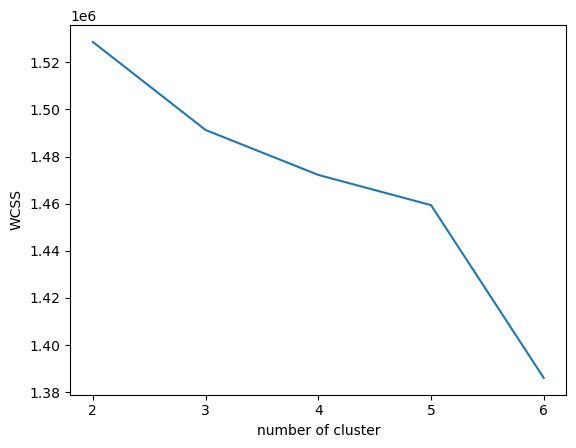

In [33]:
plt.plot(range(2,7),wcss)
plt.xticks(range(2,7))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [35]:
kmeans.cluster_centers_

array([[ 0.07505989,  0.01809569, -0.02174284, ..., -0.06426429,
        -0.1077327 , -0.02738149],
       [-0.70915544,  0.12904969,  0.19575833, ...,  0.1462676 ,
         1.4953437 ,  0.615397  ],
       [-0.08458998, -0.0219447 ,  0.02455343, ...,  0.07480711,
         0.11894184,  0.02901342]])

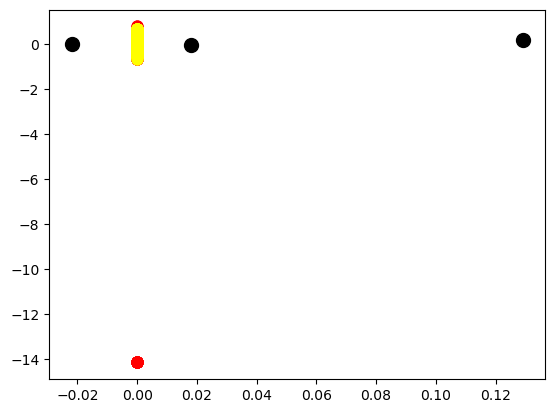

In [36]:
plt.scatter(X[y_kmeans == 0, 5], X[y_kmeans == 0, 7], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 5], X[y_kmeans == 1, 7], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 5], X[y_kmeans == 2, 7], s = 60, c = 'yellow', label = 'Cluster3')
plt.scatter( kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'black', label = 'Centroids')

In [37]:
score = silhouette_score(X,kmeans.labels_)
score

0.03147147584659561

In [38]:
k=KneeLocator(range(2,7),wcss,curve='convex',direction='decreasing')

In [39]:
k.elbow

3

In [40]:
models={
    'KMeansClustering':KMeans(n_clusters=3),
    'AgglomerativeClustering':AgglomerativeClustering(n_clusters=3)#,
    #'DBSCAN':DBSCAN(eps=0.5,min_samples=6,algorithm='ball_tree')
}
trained_model_list=[]
model_list=[]
silhouette_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit_predict(X)
    #print(list(model.labels_))
    score = silhouette_score(X,model.labels_)

    #print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print(list(models.keys())[i])
    print("Silhouette score:",score)

    silhouette_list.append(score)
    
    print('='*35)
    print('\n')

Model Training Performance
KMeansClustering
Silhouette score: 0.031499623084792795


Model Training Performance
AgglomerativeClustering
Silhouette score: 0.3371685166068995




In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y_kmeans,test_size=0.20,random_state=42)

In [42]:
models = {
    'Random Forest:' : RandomForestClassifier(oob_score=True),
    'Logistic Regression:' : LogisticRegression(),
    'Decision Tree Classifier:' : DecisionTreeClassifier(),
    'Support Vector Classifier:': SVC(gamma='auto'),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=42)
}

In [43]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = round(accuracy_score(y_test,y_pred)*100,2)
        
        report[list(models.keys())[i]] = accuracy
    return report

In [44]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest:': 99.7,
 'Logistic Regression:': 99.7,
 'Decision Tree Classifier:': 98.52,
 'Support Vector Classifier:': 99.7,
 'Gradient Boosting Classifier': 95.7}

In [ ]:
'''for i in set(list(y_kmeans)):
    cluster = X[y_kmeans == i]
    cluster = np.delete(cluster, -1, axis=1)
    output = y_kmeans[y_kmeans == i] 
    X_train,X_test,y_train,y_test = train_test_split(cluster,output,test_size=0.20,random_state=42)
    cluster_report = evaluate_model(X_train,y_train,X_test,y_test,models)
    cluster_report:dict=evaluate_model(X_train,y_train,X_test,y_test,models)
    print(cluster_report)
    print('\n====================================================================================\n')
    logging.info(f'Cluster {i} Report : {cluster_report}')

    # To get best model score from dictionary 
    best_model_score = max(sorted(cluster_report.values()))

    best_model_name = list(cluster_report.keys())[
        list(cluster_report.values()).index(best_model_score)
    ]

    best_model = models[best_model_name]

    print(f'For Cluster {i}, Best Model Found, Model Name : {best_model_name} , R2 Score : {best_model_score}')
    print('\n====================================================================================\n')'''